In [1]:
!pip install psycopg

ERROR: Could not find a version that satisfies the requirement psycopg (from versions: none)
ERROR: No matching distribution found for psycopg


In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Columns to use according to ERD
#columns = ['Source','Severity', 'Start_Time', 'End_Time','Start_Lat', 'Sunrise_Sunset', 'Start_Lng','Side', 'City', 'County',
          #'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Bump', 'Crossing',
       #'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       #'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Weather_Condition']

In [13]:
#Columns to use according to ERD
columns = ['Source','Severity', 'Start_Time', 'End_Time','Start_Lat', 'Sunrise_Sunset', 'Start_Lng', 'Weather_Condition']

In [ ]:
#Reading csv data into df
df = pd.read_csv('US_Accidents_June20.csv', usecols = columns)
df.head()

In [6]:
#Drop null values, subject to change
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

0

In [7]:
#Labelling output and input, subject to change
y = df['Severity']
X = df.drop(['Severity','Start_Time','End_Time','City','County','Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],axis=1)

In [8]:
X.shape

(3042201, 9)

In [9]:
#Use dummy variables for input features, convert to numerical data 
X = pd.get_dummies(X)
X.head

<bound method NDFrame.head of          Start_Lat   Start_Lng  Visibility(mi)  Wind_Speed(mph)  Source_Bing  \
2        39.063148  -84.032608            10.0              3.5            0   
3        39.747753  -84.205582             9.0              4.6            0   
4        39.627781  -84.188354             6.0              3.5            0   
5        40.100590  -82.925194             7.0              3.5            0   
6        39.758274  -84.230507             7.0              3.5            0   
...            ...         ...             ...              ...          ...   
3513612  34.002480 -117.379360            10.0             13.0            1   
3513613  32.766960 -117.148060            10.0              6.0            1   
3513614  33.775450 -117.847790            10.0             10.0            1   
3513615  33.992460 -118.403020            10.0              8.0            1   
3513616  34.133930 -117.230920             7.0              7.0            1   

         

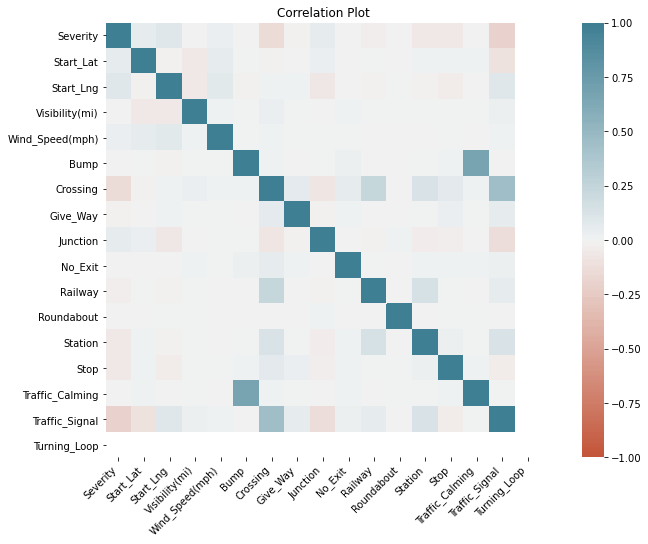

In [10]:
# Correlation plot
plt.figure(figsize=(15,8))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation Plot")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
#Balancing the dataset
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(1, 600796), (2, 600796), (3, 600796), (4, 600796)]


In [11]:
#splitting the data into training and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3, random_state=42)

In [12]:
#Decision Tree Classifier model on training data and predictions
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [13]:
# Accuracy 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9448412940595543

In [14]:
#Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    180111
           2       0.92      0.85      0.89    180121
           3       0.87      0.93      0.90    180299
           4       0.99      1.00      1.00    180425

    accuracy                           0.94    720956
   macro avg       0.95      0.94      0.94    720956
weighted avg       0.95      0.94      0.94    720956



In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_test)
y_pred

array([[0.19744039, 0.31821236, 0.31939709, 0.16495016],
       [0.23994495, 0.27453894, 0.3544178 , 0.13109831],
       [0.18017382, 0.26159216, 0.33424999, 0.22398403],
       ...,
       [0.16893854, 0.26837707, 0.30522156, 0.25746283],
       [0.09765074, 0.15717432, 0.19055462, 0.55462032],
       [0.17459792, 0.18209259, 0.29575598, 0.3475535 ]])